# Binary Classification

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!ls ./drive/MyDrive/2021/ANN/old

ANN01.py				   ANN_class_aux.py
ANN_1Perceptron.ipynb			   ANN_np03b.ipynb
ANN_2Minnet.ipynb			   ANN_np03.ipynb
ANN_3mlpR.ipynb				   ANN_np04a.ipynb
ANN_4mlpInputNormMotivation.ipynb	   ANN_revealed.py
ANN_4mlpInputNormMotivation_Student.ipynb  ANN_WhyAndHow02.ipynb
ANN_5Classification.ipynb		   DrawANN03.py
ANN_aux.py				   __pycache__


In [6]:
import sys
sys.path.append("./drive/MyDrive/2021/ANN/old") # my path

In [3]:
# For beautiful math display
from IPython.display import Math

In [4]:
import numpy as np
from matplotlib import pyplot as plt

#from DrawANN03 import *

In [7]:
from ANN_aux import *

# XOR Revisited

In [8]:
# XOR

X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
Y = np.array([[0], [1], [1], [0]])

for i in range(4):
    print("{} {} | {}".format( *X[i],  *Y[i]))


0 0 | 0
0 1 | 1
1 0 | 1
1 1 | 0


In [9]:
Math(r'x \in \mathbb{R}^2 \mapsto y \in \mathbb{R}^1')

<IPython.core.display.Math object>

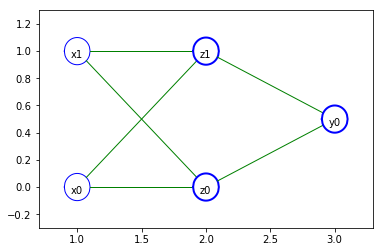

In [ ]:
#draw_mlp2(2, 2, 1)

Time spent: 0.5142030715942383
Training
MSE =  1.9145284391164634e-29
RMSE =  4.375532469444677e-15
0 0 | 0 | 0.0000
0 1 | 1 | 1.0000
1 0 | 1 | 1.0000
1 1 | 0 | 0.0000


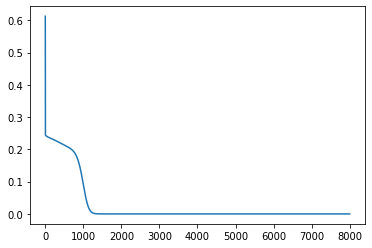

In [10]:

N, D = X.shape
_, K = Y.shape
M = 2

c = np.random.normal(0, 1, K).reshape((K,1))
v = np.random.normal(0, 1, K*M).reshape((K,M))
b = np.random.normal(0, 2, M).reshape((M,1))
w = np.random.normal(0, 2, M*D).reshape((M,D))

t1 = time.time()

cc, vv, bb, ww, train_loss = train_mlp2r(c, v, b, w, X, Y, 0.3, 8000, mse_loss)
plt.plot(train_loss)

t2 = time.time()

print('Time spent:', t2 - t1)

Yp = mlp2r(cc, vv, bb, ww, X)
print('Training')
print('MSE = ', mse_loss(X, Y, Yp))
print('RMSE = ', np.sqrt(mse_loss(X, Y, Yp)))

for i in range(4):
    print("{} {} | {} | {:.4f}".format( *X[i],  *Y[i], *Yp[i]))

# BUT it will be much easier to train a network for binary classification

Key mechanism

1. output activation is sigmoid

2. cross-entropy loss

In [11]:
# Regression output activation: identity

Math(r'f(w, x) = c + \sum_j v_j \cdot h\left(b_j + \sum_i w_{ji} x_i\right)')

<IPython.core.display.Math object>

In [12]:
# Binary Classification: sigmoid

Math(r'f(w, x) = \sigma( c + \sum_j v_j \cdot h\left(b_j + \sum_i w_{ji} x_i\right) )')

<IPython.core.display.Math object>

In [13]:
Math(r'\sigma(a) = \frac{1}{1 + \exp(-a)}')

<IPython.core.display.Math object>

In [14]:
# Regression loss: mean squared error

Math(r'\mathcal{L} = \frac{1}{2} \sum_n \left(y_n - t_n\right)^2')

<IPython.core.display.Math object>

In [15]:
# Binary Classification: cross-entroy loss

Math(r'\mathcal{L} = \sum_n \mathcal{L}_n')

<IPython.core.display.Math object>

In [16]:
Math(r'\mathcal{L}_n =\left\{ \begin{array}{ll}-\log(y_n) & \quad \mbox{if} \quad t_n = 1, \\-\log(1-y_n) & \quad \text{if} \quad t_n = 0 \\ \end{array} \right.')

<IPython.core.display.Math object>

In [ ]:
np.log(0)

C:\toolkit\Anaconda\envs\py35a\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


-inf

Text(0.5, 1.0, 'Ground Truth is 1')

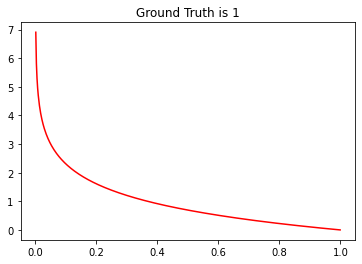

In [17]:
ys = np.linspace(0.001, 0.999, 500)
plt.plot(ys, -np.log(ys), 'r')
plt.title('Ground Truth is 1')
#plt.plot(xs, -np.log(1 - ys), 'b')


Text(0.5, 1.0, 'Ground Truth is 0')

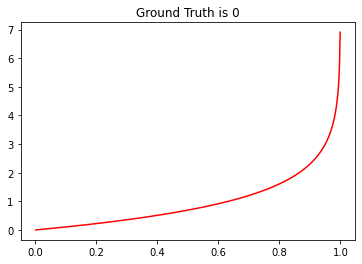

In [18]:
ys = np.linspace(0.001, 0.999, 500)
plt.plot(ys, -np.log(1 - ys), 'r')
plt.title('Ground Truth is 0')

Implementation

In [21]:
Y

array([[0],
       [1],
       [1],
       [0]])

In [22]:
# test
Yp = np.array([[0.0002], [0.99999], [0.000001], [0.998]])


In [ ]:
Y == 1

array([[False],
       [ True],
       [ True],
       [False]], dtype=bool)

In [ ]:
Yp [Y==1]

array([  9.99990000e-01,   1.00000000e-06])

In [ ]:
Yp [Y==0]

array([  2.00000000e-04,   9.98000000e-01])

In [23]:
np.sum(-np.log(Yp[Y == 1])) ## Only the tn == 1 part

13.815520558014274

In [ ]:
# Student's implement

In [19]:
def biclass_loss(y, gt):
    # DUMMY
   
    
    return np.sum(-np.log(y[gt == 1]))+np.sum(-np.log(1-y[gt == 0]))

In [24]:
biclass_loss(Yp, Y)

20.030328676439133

In [ ]:
# If you do it right, you will get ~20.0303

# Multiclass Classification

Key Mechanism

1. One-hot coding

2. Softmax

3. Multiclass cross entropy loss

In [ ]:
Math(r'f(w, x) = \mathrm{softmax}( c + \sum_j v_j \cdot h\left(b_j + \sum_i w_{ji} x_i\right) )')

<IPython.core.display.Math object>

In [ ]:
Math(r'\mathrm{softmax}(a_k) = \frac{\exp(a_k)}{\sum_{i=1}^K \exp(a_i)}')

<IPython.core.display.Math object>

In [ ]:
Math(r'\mathcal{L}_n = - \sum_k t_{n,k} \cdot \log (y_{n,k}) ')

<IPython.core.display.Math object>